### Google.colab
Only execute this cell when use on google colab platform (colab).

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/Nak007/optimization">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [ ]:
# Mount with google drive.
from google.colab import drive
drive.mount('/content/dirve')

# Import other libraries required.
!git clone 'http://github.com/Nak007/optimization.git'

# Example

In [10]:
from sklearn.datasets import load_breast_cancer
import pandas as pd, numpy as np, sys
sys.path.append('/content/optimization')
from Optimization import *
pd.options.display.float_format = '{:,.4f}'.format

X = pd.DataFrame(load_breast_cancer().data)
X.columns = [c.replace(' ','_') for c in 
             load_breast_cancer().feature_names]

In [13]:
labels = load_breast_cancer().target
x1 = np.log(X['mean_area'].values)
x2 = np.log(X['mean_compactness'].values)

In [14]:
model_0 = impurity_binned_2d(bin_width='equal', n_bins=20).fit(x1, x2, labels)

The attribute **info** provides information about output from each iteration.

In [15]:
model_0.info

,bin1,bin2,gini,add_bin1,add_bin2,pct_delta
0,1,1,0.4675,nan,nan,0.0649
1,2,2,0.1507,6.5383,-2.0712,0.6777
2,3,3,0.1307,6.2525,-1.7832,0.1327
3,4,4,0.1172,5.8238,-2.3593,0.1036
4,5,5,0.1117,6.8241,-2.7913,0.0465
5,6,6,0.1078,6.6812,-2.6473,0.0352
6,7,7,0.1032,6.3954,-1.9272,0.0424
7,8,8,0.1008,6.1096,-1.6391,0.0233
8,9,9,0.0989,5.9667,-2.9354,0.0184
9,10,10,0.0979,5.2521,-2.2152,0.0110


Given $n^{th}$ iteration ($i$), this **plot** plots the corresponding output of bin edges i.e. **bin_edge1**, and **bin_edge2** on x, and y axis, respectively. 

For this example, we select $5^{th}$ iteration.

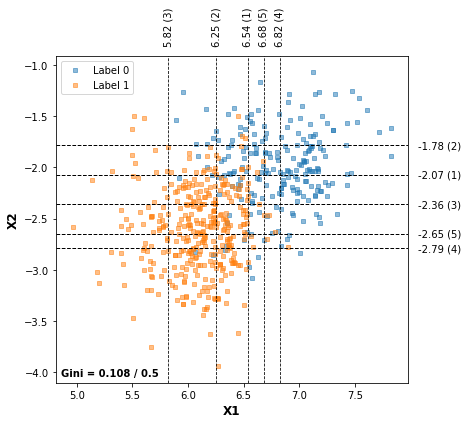

In [16]:
model_0.plot(5)

Also, we can provide initial bin edges before running the algorithm.

In [17]:
def iqr_bounds(x):
    
    '''Compute IQR range given array (x)'''
    iqr = np.percentile(x1, q=[25,75])
    iqr = iqr + np.array([-1,1])*np.diff(iqr)*1.5
    return np.fmax(np.fmin(iqr, max(x)),min(x))

In [18]:
eps = np.finfo(float).eps*10

q1 = iqr_bounds(x1)
bin1 = [min(x1), q1[0], q1[1], max(x1) + eps]
bin2 = [min(x2), np.median(x2), max(x2) + eps]

In [31]:
print('bin1 ==> ', np.round(bin1,4))
print('bin2 ==> ', np.round(bin2,4))

bin1 ==>  [4.9663 5.1083 7.5954 7.8244]
bin2 ==>  [-3.9435 -2.3791 -1.0631]


In [22]:
model_1 = impurity_binned_2d(bin_width='equal',n_bins=20).fit(x1, x2, labels, bin1=bin1, bin2=bin2)

In [23]:
model_1.info

,bin1,bin2,gini,add_bin1,add_bin2,pct_delta
0,3,2,0.3273,nan,nan,0.3454
1,4,3,0.1466,6.5383,-2.0712,0.5522
2,5,4,0.1248,6.2525,-1.7832,0.1487
3,6,5,0.1158,5.8238,-2.7913,0.0723
4,7,6,0.1103,6.8241,-2.6473,0.0470
5,8,7,0.1059,6.6812,-1.9272,0.0397
6,9,8,0.1018,6.3954,-1.6391,0.0393
7,10,9,0.0996,6.1096,-2.9354,0.0211
8,11,10,0.0979,5.9667,-2.2152,0.0177
9,12,11,0.0972,5.2521,-2.5033,0.0064


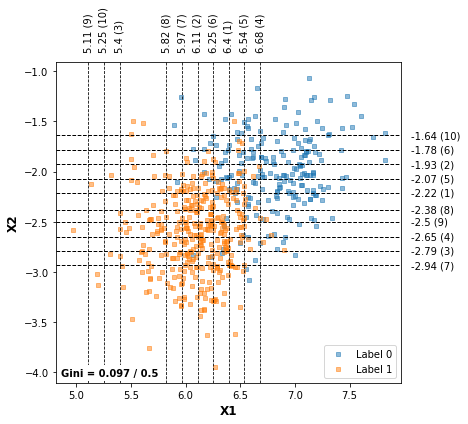

In [25]:
model_1.plot(10)